In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__

'2.18.0'

In [4]:
mnist = tf.keras.datasets.mnist
(tr_img, tr_lab), (t_img, t_lab) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


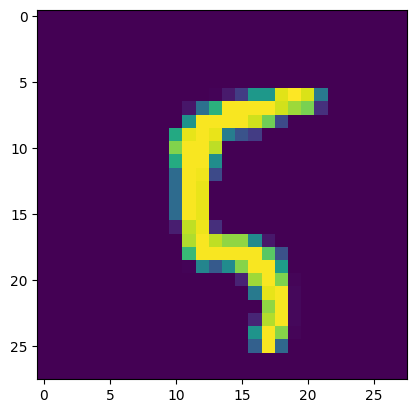

In [8]:
len(tr_img)
len(tr_lab)
plt.imshow(tr_img[100])

In [9]:
dataset = tf.data.Dataset.from_tensor_slices((tr_img, tr_lab)).batch(1000)
testset = tf.data.Dataset.from_tensor_slices((t_img, t_lab)).batch(1000)

W0000 00:00:1734257945.236315  205523 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(30))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.fit(dataset, epochs=10, validation_data=testset)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5101 - loss: 64.1955 - val_accuracy: 0.8512 - val_loss: 11.0150
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8512 - loss: 10.1908 - val_accuracy: 0.8728 - val_loss: 7.5905
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8705 - loss: 7.1121 - val_accuracy: 0.8785 - val_loss: 6.2403
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8781 - loss: 5.6244 - val_accuracy: 0.8810 - val_loss: 5.1875
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8853 - loss: 4.6019 - val_accuracy: 0.8848 - val_loss: 4.4827
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8895 - loss: 3.8459 - val_accuracy: 0.8830 - val_loss: 3.9864
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8891 - loss: 3.4034 - val_accuracy: 0.8838 - val_loss: 3.5403
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8916 - loss: 2.9749 - val_accuracy: 0.8851 - val_lo

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │        23,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,582 (279.62 KB)

 Trainable params: 23,860 (93.20 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,722 (186.42 KB)

In [15]:
model.evaluate(testset)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8814 - loss: 2.8645


[2.567809820175171, 0.8942999839782715]

In [19]:
test = tf.expand_dims(t_img[2], 0)
result = model(test)
result = tf.argmax(result, axis = -1)
print(result)

tf.Tensor([1], shape=(1,), dtype=int64)


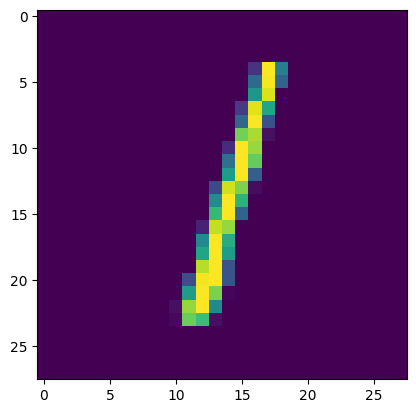

In [17]:
plt.imshow(t_img[2])

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(30))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
model.fit(dataset, epochs=10, validation_data=testset)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4438 - loss: 77.2715 - val_accuracy: 0.8627 - val_loss: 10.0655
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8073 - loss: 14.3761 - val_accuracy: 0.8873 - val_loss: 7.0135
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8289 - loss: 10.5790 - val_accuracy: 0.8965 - val_loss: 5.7229
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8391 - loss: 8.8701 - val_accuracy: 0.8957 - val_loss: 5.0985
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8474 - loss: 7.2838 - val_accuracy: 0.9019 - val_loss: 4.2412
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8530 - loss: 6.1671 - val_accuracy: 0.8998 - val_loss: 3.8722
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8532 - loss: 5.5143 - val_accuracy: 0.9052 - val_loss: 3.3902
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8568 - loss: 4.7448 - val_accuracy: 0.9018 - val_l

In [24]:
test = tf.expand_dims(t_img[56], 0)
result = model(test)
result = tf.argmax(result, axis = -1)
print(result)

tf.Tensor([4], shape=(1,), dtype=int64)


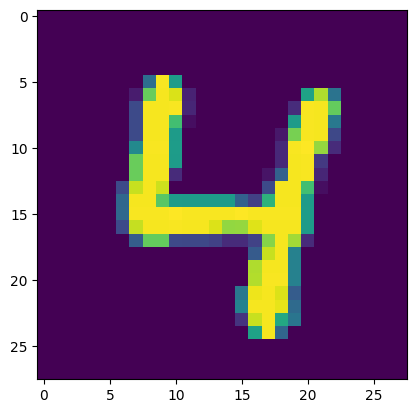

In [25]:
plt.imshow(t_img[56])

In [31]:
cif = tf.keras.datasets.cifar10
(x_tr, y_tr), (x_t, y_t) = cif.load_data()
x_tr = x_tr.astype('float32') / 255.0
x_t = x_t.astype('float32') / 255.0

In [35]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, 7, strides=2, padding='same', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, padding='same'))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same'))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same'))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same'))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same'))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same'))
model.add(tf.keras.layers.Conv2D(64, 3, padding='same'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=2, padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1000))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(dataset, epochs=10, validation_data=testset)

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_9_1/Cast:0", shape=(None, 28, 28), dtype=float32). Expected shape (None, 32, 32, 3), but input has incompatible shape (None, 28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 28, 28), dtype=uint8)
  • training=True
  • mask=None